### Data analysis and visualization

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [113]:
df = pd.read_csv("PIMA_diabetes.csv")

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [115]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [116]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [117]:
df.groupby("Outcome").size()

Outcome
0    500
1    268
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E1FD5C3518>,
      dtype=object)

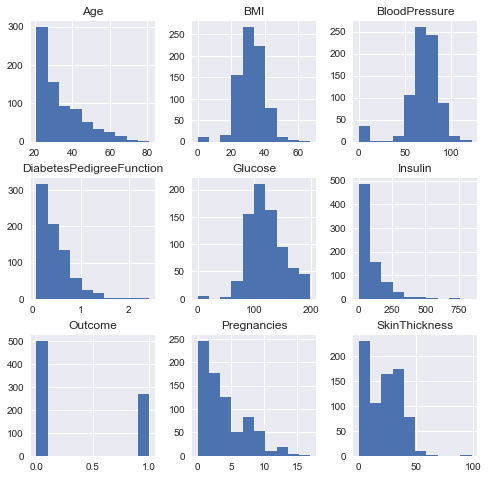

In [118]:
df.hist(figsize=(8,8))

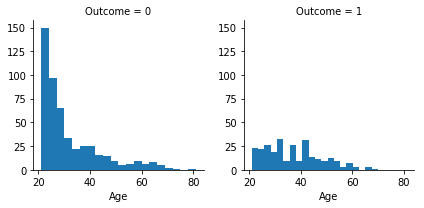

In [16]:
g = sns.FacetGrid(df, col='Outcome')
g.map(plt.hist, 'Age', bins=20)

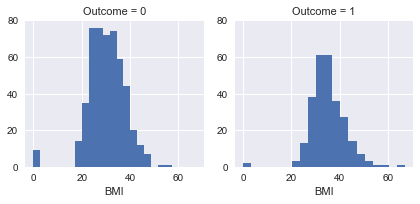

In [21]:
g = sns.FacetGrid(df, col='Outcome')
g.map(plt.hist, 'BMI', bins=20)

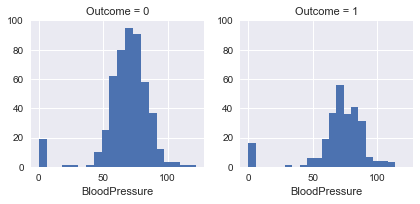

In [22]:
g = sns.FacetGrid(df, col='Outcome')
g.map(plt.hist, 'BloodPressure', bins=20)

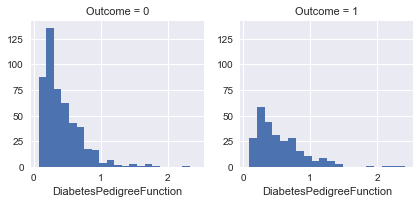

In [23]:
g = sns.FacetGrid(df, col='Outcome')
g.map(plt.hist, 'DiabetesPedigreeFunction', bins=20)

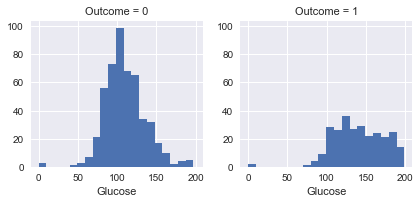

In [27]:
g = sns.FacetGrid(df, col='Outcome')
g.map(plt.hist, 'Glucose', bins=20)

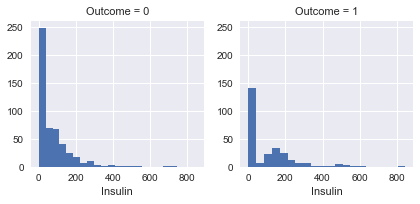

In [30]:
g = sns.FacetGrid(df, col='Outcome')
g.map(plt.hist, 'Insulin', bins=20)

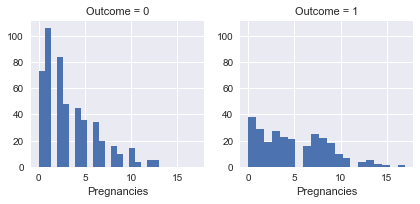

In [36]:
g = sns.FacetGrid(df, col='Outcome')
g.map(plt.hist, 'Pregnancies',bins=20)

In [10]:
cm=df.corr()

In [13]:
cm

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


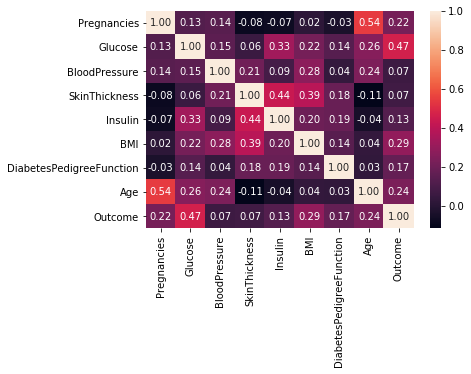

In [14]:
sns.heatmap(cm,annot=True,fmt='.2f')

### Lets run classifier now

In [119]:
X = df.iloc[:,0:8]
y = df.iloc[:,8]

In [120]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [76]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [121]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None)

In [122]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [123]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [124]:
cm

array([[93, 14],
       [18, 29]], dtype=int64)

In [125]:
from sklearn.metrics import accuracy_score

In [126]:
print(accuracy_score(y_test,y_pred))

0.7922077922077922


### Feature selection
Lets see if we can increase accuracy after choosing appropriate features

##### Using Kbest method

In [37]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [48]:
X = pima.iloc[:,0:8]
Y = pima.iloc[:,8]
select_top_k = SelectKBest(score_func=chi2,k=8)

In [49]:
fit = select_top_k.fit(X,Y)

In [59]:
scores=fit.scores_

In [60]:
columns=list(X)

In [93]:
sorted(list(zip(scores,columns)), key=lambda tup: tup[0])

[(5.392681546971445, 'DiabetesPedigreeFunction'),
 (17.605373215320718, 'BloodPressure'),
 (53.10803983632434, 'SkinThickness'),
 (111.51969063588255, 'Pregnancies'),
 (127.66934333103643, 'BMI'),
 (181.30368904430023, 'Age'),
 (1411.887040644141, 'Glucose'),
 (2175.5652729220137, 'Insulin')]

##### Assessing features using random forests : 
We will observe bit improvement in accuracy after eliminating some features.Lets see

 1) Glucose                        0.250660
 2) BMI                            0.164251
 3) Age                            0.145262
 4) DiabetesPedigreeFunction       0.128659
 5) BloodPressure                  0.089024
 6) Pregnancies                    0.081379
 7) Insulin                        0.072773
 8) SkinThickness                  0.067992


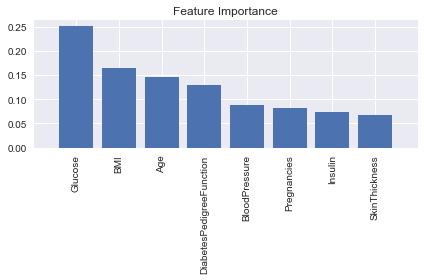

In [128]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df.columns[0:8]

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
#plt.savefig('images/04_09.png', dpi=300)
plt.show()

In [163]:
cols=['Glucose',
'BMI',
'Age',
'DiabetesPedigreeFunction','BloodPressure','Outcome']

In [164]:
df_reduced=df[cols]

In [166]:
df_reduced.head()

,Glucose,BMI,Age,DiabetesPedigreeFunction,BloodPressure,Outcome
0,148,33.6,50,0.627,72,1
1,85,26.6,31,0.351,66,0
2,183,23.3,32,0.672,64,1
3,89,28.1,21,0.167,66,0
4,137,43.1,33,2.288,40,1


In [168]:
X = df_reduced.iloc[:,0:5]
y = df_reduced.iloc[:,5]

In [169]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [170]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [171]:
X_train.head()

,Glucose,BMI,Age,DiabetesPedigreeFunction,BloodPressure
603,150,35.2,54,0.692,78
118,97,28.2,22,0.443,60
247,165,52.3,23,0.427,90
157,109,25.2,23,0.833,56
468,120,30.0,38,0.183,0


In [172]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [173]:
# Fitting Naive Bayes to the Training set
classifier = GaussianNB()
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [174]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.8051948051948052


In [175]:
cm

array([[95, 12],
       [18, 29]], dtype=int64)